In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import matrix, solvers

In [12]:
!pip install cvxopt

In [13]:
df = pd.read_csv("iris.csv")  #reading the csv file
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [14]:
setosa_variety = df[df["variety"] == "Setosa"].loc[:,["petal.length","sepal.width"]]  #setosa
setosa_variety


,petal.length,sepal.width
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2
3,1.5,3.1
4,1.4,3.6
5,1.7,3.9
6,1.4,3.4
7,1.5,3.4
8,1.4,2.9
9,1.5,3.1


In [15]:
versicolor_variety = df[df["variety"] == "Versicolor"].loc[:,["petal.length","sepal.width"]] #versicolor
versicolor_variety


,petal.length,sepal.width
50,4.7,3.2
51,4.5,3.2
52,4.9,3.1
53,4.0,2.3
54,4.6,2.8
55,4.5,2.8
56,4.7,3.3
57,3.3,2.4
58,4.6,2.9
59,3.9,2.7


In [16]:
virginica_variety = df[df["variety"] == "Virginica"].loc[:,["petal.length","sepal.width"]] #virginica
virginica_variety


,petal.length,sepal.width
100,6.0,3.3
101,5.1,2.7
102,5.9,3.0
103,5.6,2.9
104,5.8,3.0
105,6.6,3.0
106,4.5,2.5
107,6.3,2.9
108,5.8,2.5
109,6.1,3.6


In [17]:
class SVM:  # class for our support vector machine
    def __init__(self):
        pass
    def fit(self,X,y):
        self.X = X
        self.y = y
        self.m = X.shape[0]
        #getting our matrix values
        P = np.empty((self.m,self.m))
        for i in range(self.m):
            for j in range(self.m):
                P[i,j] = y[i]*y[j]*np.dot(X[i],X[j])
        q = -np.ones((self.m,1))
        G = -np.eye(self.m)
        h = np.zeros((self.m,1))
        A = y.reshape((1,self.m))
        b = np.zeros((1,1))

        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)
        A = matrix(A.astype('double'))
        b = matrix(b)

        sol = solvers.qp(P,q,G,h,A,b)
        self.lambdas = np.array(sol['x']).reshape(self.m)  #getting the values of the lagrangia multipliers
        SV = np.where(self.lambdas > 1e-4)[0][0]  #getting a support vector point
        self.b = y[SV] - sum(self.lambdas * y * np.dot(X, X[SV].T))  #value of bias/threshold weight
        
    def plot(self):  #plotting the decision boundary
        x_min = min(self.X[:, 0]) - 0.5
        x_max = max(self.X[:, 0]) + 0.5
        y_min = min(self.X[:, 1]) - 0.5
        y_max = max(self.X[:, 1]) + 0.5
        step = 0.02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
        d = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)

        Z = self.b + np.dot((self.lambdas * self.y).T, np.dot(self.X, d.T))
        Z = Z.reshape(xx.shape)
    
    
        fig, ax = plt.subplots()
        sns.scatterplot(x=self.X[:, 0], y=self.X[:, 1], hue=self.y, ax=ax)
        ax.contour(xx, yy, Z, levels=[-1, 0, 1])
        plt.show()
        

In [18]:
svm = SVM()

In [19]:
df1 = setosa_variety.to_numpy()
df1

array([[1.4, 3.5],
       [1.4, 3. ],
       [1.3, 3.2],
       [1.5, 3.1],
       [1.4, 3.6],
       [1.7, 3.9],
       [1.4, 3.4],
       [1.5, 3.4],
       [1.4, 2.9],
       [1.5, 3.1],
       [1.5, 3.7],
       [1.6, 3.4],
       [1.4, 3. ],
       [1.1, 3. ],
       [1.2, 4. ],
       [1.5, 4.4],
       [1.3, 3.9],
       [1.4, 3.5],
       [1.7, 3.8],
       [1.5, 3.8],
       [1.7, 3.4],
       [1.5, 3.7],
       [1. , 3.6],
       [1.7, 3.3],
       [1.9, 3.4],
       [1.6, 3. ],
       [1.6, 3.4],
       [1.5, 3.5],
       [1.4, 3.4],
       [1.6, 3.2],
       [1.6, 3.1],
       [1.5, 3.4],
       [1.5, 4.1],
       [1.4, 4.2],
       [1.5, 3.1],
       [1.2, 3.2],
       [1.3, 3.5],
       [1.4, 3.6],
       [1.3, 3. ],
       [1.5, 3.4],
       [1.3, 3.5],
       [1.3, 2.3],
       [1.3, 3.2],
       [1.6, 3.5],
       [1.9, 3.8],
       [1.4, 3. ],
       [1.6, 3.8],
       [1.4, 3.2],
       [1.5, 3.7],
       [1.4, 3.3]])

In [20]:
df2 = versicolor_variety.to_numpy()
df2

array([[4.7, 3.2],
       [4.5, 3.2],
       [4.9, 3.1],
       [4. , 2.3],
       [4.6, 2.8],
       [4.5, 2.8],
       [4.7, 3.3],
       [3.3, 2.4],
       [4.6, 2.9],
       [3.9, 2.7],
       [3.5, 2. ],
       [4.2, 3. ],
       [4. , 2.2],
       [4.7, 2.9],
       [3.6, 2.9],
       [4.4, 3.1],
       [4.5, 3. ],
       [4.1, 2.7],
       [4.5, 2.2],
       [3.9, 2.5],
       [4.8, 3.2],
       [4. , 2.8],
       [4.9, 2.5],
       [4.7, 2.8],
       [4.3, 2.9],
       [4.4, 3. ],
       [4.8, 2.8],
       [5. , 3. ],
       [4.5, 2.9],
       [3.5, 2.6],
       [3.8, 2.4],
       [3.7, 2.4],
       [3.9, 2.7],
       [5.1, 2.7],
       [4.5, 3. ],
       [4.5, 3.4],
       [4.7, 3.1],
       [4.4, 2.3],
       [4.1, 3. ],
       [4. , 2.5],
       [4.4, 2.6],
       [4.6, 3. ],
       [4. , 2.6],
       [3.3, 2.3],
       [4.2, 2.7],
       [4.2, 3. ],
       [4.2, 2.9],
       [4.3, 2.9],
       [3. , 2.5],
       [4.1, 2.8]])

In [21]:
df3 = virginica_variety.to_numpy()
df3

array([[6. , 3.3],
       [5.1, 2.7],
       [5.9, 3. ],
       [5.6, 2.9],
       [5.8, 3. ],
       [6.6, 3. ],
       [4.5, 2.5],
       [6.3, 2.9],
       [5.8, 2.5],
       [6.1, 3.6],
       [5.1, 3.2],
       [5.3, 2.7],
       [5.5, 3. ],
       [5. , 2.5],
       [5.1, 2.8],
       [5.3, 3.2],
       [5.5, 3. ],
       [6.7, 3.8],
       [6.9, 2.6],
       [5. , 2.2],
       [5.7, 3.2],
       [4.9, 2.8],
       [6.7, 2.8],
       [4.9, 2.7],
       [5.7, 3.3],
       [6. , 3.2],
       [4.8, 2.8],
       [4.9, 3. ],
       [5.6, 2.8],
       [5.8, 3. ],
       [6.1, 2.8],
       [6.4, 3.8],
       [5.6, 2.8],
       [5.1, 2.8],
       [5.6, 2.6],
       [6.1, 3. ],
       [5.6, 3.4],
       [5.5, 3.1],
       [4.8, 3. ],
       [5.4, 3.1],
       [5.6, 3.1],
       [5.1, 3.1],
       [5.1, 2.7],
       [5.9, 3.2],
       [5.7, 3.3],
       [5.2, 3. ],
       [5. , 2.5],
       [5.2, 3. ],
       [5.4, 3.4],
       [5.1, 3. ]])

In [22]:
X1 = np.concatenate([df1, df2], axis=0)
X1

array([[1.4, 3.5],
       [1.4, 3. ],
       [1.3, 3.2],
       [1.5, 3.1],
       [1.4, 3.6],
       [1.7, 3.9],
       [1.4, 3.4],
       [1.5, 3.4],
       [1.4, 2.9],
       [1.5, 3.1],
       [1.5, 3.7],
       [1.6, 3.4],
       [1.4, 3. ],
       [1.1, 3. ],
       [1.2, 4. ],
       [1.5, 4.4],
       [1.3, 3.9],
       [1.4, 3.5],
       [1.7, 3.8],
       [1.5, 3.8],
       [1.7, 3.4],
       [1.5, 3.7],
       [1. , 3.6],
       [1.7, 3.3],
       [1.9, 3.4],
       [1.6, 3. ],
       [1.6, 3.4],
       [1.5, 3.5],
       [1.4, 3.4],
       [1.6, 3.2],
       [1.6, 3.1],
       [1.5, 3.4],
       [1.5, 4.1],
       [1.4, 4.2],
       [1.5, 3.1],
       [1.2, 3.2],
       [1.3, 3.5],
       [1.4, 3.6],
       [1.3, 3. ],
       [1.5, 3.4],
       [1.3, 3.5],
       [1.3, 2.3],
       [1.3, 3.2],
       [1.6, 3.5],
       [1.9, 3.8],
       [1.4, 3. ],
       [1.6, 3.8],
       [1.4, 3.2],
       [1.5, 3.7],
       [1.4, 3.3],
       [4.7, 3.2],
       [4.5, 3.2],
       [4.9,

In [23]:
z1 = np.ones((50,))
z1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
z2 = -np.ones((50,))
z2

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [25]:
z = np.concatenate([z1,z2],axis=0)
z

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [26]:
svm1 = SVM()

     pcost       dcost       gap    pres   dres
 0: -4.3867e+00 -8.1716e+00  3e+02  1e+01  2e+00
 1: -2.3798e+00 -2.5258e+00  2e+01  1e+00  2e-01
 2: -4.3479e-01 -1.7538e+00  2e+00  5e-02  6e-03
 3: -6.7595e-01 -1.0544e+00  5e-01  1e-02  1e-03
 4: -8.1435e-01 -1.1260e+00  4e-01  4e-03  5e-04
 5: -1.0085e+00 -1.0271e+00  2e-02  8e-05  1e-05
 6: -1.0251e+00 -1.0253e+00  2e-04  9e-07  1e-07
 7: -1.0253e+00 -1.0253e+00  2e-06  9e-09  1e-09
 8: -1.0253e+00 -1.0253e+00  2e-08  9e-11  1e-11
Optimal solution found.


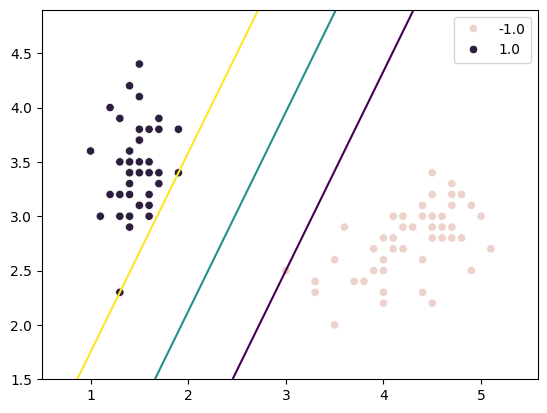

In [27]:
svm.fit(X1, z)  #decision boundary between setosa and versicolor
svm.plot()

In [28]:
X1 = np.concatenate([df2, df3], axis=0)
X1

array([[4.7, 3.2],
       [4.5, 3.2],
       [4.9, 3.1],
       [4. , 2.3],
       [4.6, 2.8],
       [4.5, 2.8],
       [4.7, 3.3],
       [3.3, 2.4],
       [4.6, 2.9],
       [3.9, 2.7],
       [3.5, 2. ],
       [4.2, 3. ],
       [4. , 2.2],
       [4.7, 2.9],
       [3.6, 2.9],
       [4.4, 3.1],
       [4.5, 3. ],
       [4.1, 2.7],
       [4.5, 2.2],
       [3.9, 2.5],
       [4.8, 3.2],
       [4. , 2.8],
       [4.9, 2.5],
       [4.7, 2.8],
       [4.3, 2.9],
       [4.4, 3. ],
       [4.8, 2.8],
       [5. , 3. ],
       [4.5, 2.9],
       [3.5, 2.6],
       [3.8, 2.4],
       [3.7, 2.4],
       [3.9, 2.7],
       [5.1, 2.7],
       [4.5, 3. ],
       [4.5, 3.4],
       [4.7, 3.1],
       [4.4, 2.3],
       [4.1, 3. ],
       [4. , 2.5],
       [4.4, 2.6],
       [4.6, 3. ],
       [4. , 2.6],
       [3.3, 2.3],
       [4.2, 2.7],
       [4.2, 3. ],
       [4.2, 2.9],
       [4.3, 2.9],
       [3. , 2.5],
       [4.1, 2.8],
       [6. , 3.3],
       [5.1, 2.7],
       [5.9,

In [29]:
svm2 = SVM()
z

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

     pcost       dcost       gap    pres   dres
 0: -3.7394e+01 -8.7261e+01  5e+02  2e+01  2e+00
 1: -1.0739e+02 -1.7754e+02  3e+02  1e+01  2e+00
 2: -5.7593e+02 -8.7585e+02  4e+02  1e+01  2e+00
 3: -1.9989e+03 -2.2838e+03  3e+02  1e+01  1e+00
 4: -6.2946e+03 -6.9640e+03  7e+02  1e+01  1e+00
 5: -3.5722e+04 -3.7828e+04  2e+03  1e+01  1e+00
 6: -1.6095e+05 -1.6859e+05  8e+03  1e+01  1e+00
 7: -2.7864e+06 -2.8208e+06  3e+04  9e+00  1e+00
 8: -1.2098e+08 -1.2170e+08  7e+05  9e+00  1e+00
 9: -1.4608e+10 -1.4634e+10  3e+07  9e+00  1e+00
10: -1.5211e+10 -1.5238e+10  3e+07  9e+00  1e+00
11: -1.5912e+10 -1.5940e+10  3e+07  9e+00  1e+00
12: -2.3781e+10 -2.3822e+10  4e+07  9e+00  1e+00
13: -2.1612e+11 -2.1658e+11  5e+08  9e+00  1e+00
14: -2.2839e+11 -2.2887e+11  5e+08  9e+00  1e+00
15: -2.4272e+11 -2.4321e+11  5e+08  9e+00  1e+00
16: -2.6319e+11 -2.6367e+11  5e+08  9e+00  1e+00
17: -3.5696e+11 -3.5754e+11  6e+08  9e+00  1e+00
Terminated (singular KKT matrix).


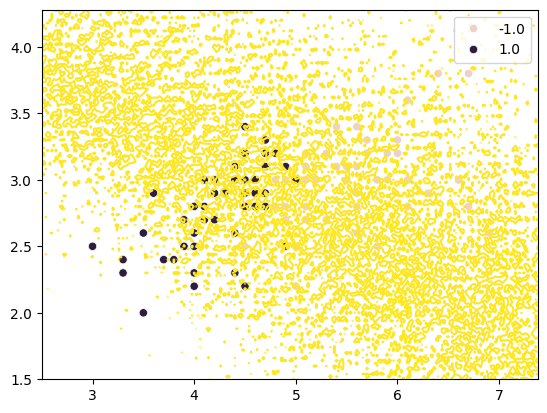

In [30]:
svm2.fit(X1, z) #versicolor and virginica are not linearly seperable so we get an error
svm2.plot()

In [31]:
X1 = np.concatenate([df1, df3], axis=0)
X1

array([[1.4, 3.5],
       [1.4, 3. ],
       [1.3, 3.2],
       [1.5, 3.1],
       [1.4, 3.6],
       [1.7, 3.9],
       [1.4, 3.4],
       [1.5, 3.4],
       [1.4, 2.9],
       [1.5, 3.1],
       [1.5, 3.7],
       [1.6, 3.4],
       [1.4, 3. ],
       [1.1, 3. ],
       [1.2, 4. ],
       [1.5, 4.4],
       [1.3, 3.9],
       [1.4, 3.5],
       [1.7, 3.8],
       [1.5, 3.8],
       [1.7, 3.4],
       [1.5, 3.7],
       [1. , 3.6],
       [1.7, 3.3],
       [1.9, 3.4],
       [1.6, 3. ],
       [1.6, 3.4],
       [1.5, 3.5],
       [1.4, 3.4],
       [1.6, 3.2],
       [1.6, 3.1],
       [1.5, 3.4],
       [1.5, 4.1],
       [1.4, 4.2],
       [1.5, 3.1],
       [1.2, 3.2],
       [1.3, 3.5],
       [1.4, 3.6],
       [1.3, 3. ],
       [1.5, 3.4],
       [1.3, 3.5],
       [1.3, 2.3],
       [1.3, 3.2],
       [1.6, 3.5],
       [1.9, 3.8],
       [1.4, 3. ],
       [1.6, 3.8],
       [1.4, 3.2],
       [1.5, 3.7],
       [1.4, 3.3],
       [6. , 3.3],
       [5.1, 2.7],
       [5.9,

In [32]:
svm3 = SVM()

     pcost       dcost       gap    pres   dres
 0: -3.3137e+00 -4.9765e+00  2e+02  2e+01  1e+00
 1: -1.6126e-01 -8.1531e-01  1e+01  9e-01  8e-02
 2:  1.9106e-02 -6.5205e-01  9e-01  1e-02  1e-03
 3: -1.5487e-01 -2.7974e-01  1e-01  7e-04  6e-05
 4: -2.2572e-01 -2.8972e-01  6e-02  1e-04  1e-05
 5: -2.5983e-01 -2.6459e-01  5e-03  1e-05  8e-07
 6: -2.6415e-01 -2.6421e-01  5e-05  1e-07  9e-09
 7: -2.6420e-01 -2.6420e-01  5e-07  1e-09  9e-11
 8: -2.6420e-01 -2.6420e-01  5e-09  1e-11  9e-13
Optimal solution found.


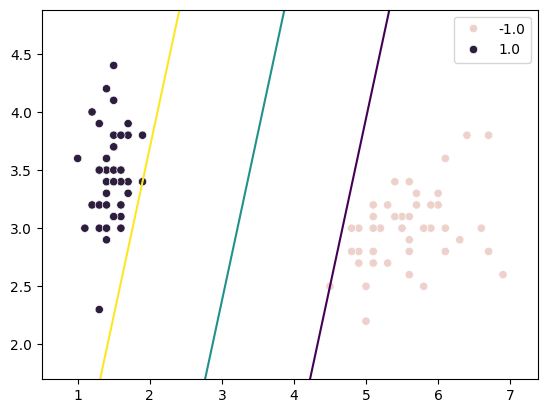

In [33]:
svm3.fit(X1, z)  #decision boundary between setosa and viginica
svm3.plot()